**Understanding of Data**

In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [344]:
#Loading the data
df_loan = pd.read_csv(r"C:\Users\Anu\Documents\Python_Workspace\Lending Club Case Study\loan.csv")
df_loan.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [345]:
#Check the size of the dataset 
df_loan.shape

(39717, 111)

In [346]:
#Check how many columns have null data
df_loan.isnull().sum().value_counts

<bound method IndexOpsMixin.value_counts of id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64>

In [347]:
len(df_loan.index)

39717

In [348]:
# percentage of missing values in each column
round(df_loan.isnull().sum()/len(df_loan.index), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [349]:
#Get the columns whose missing data is more than 90%
missing_loan_col = df_loan.columns[(100*df_loan.isnull().sum()/len(df_loan.index)) > 90]
print(missing_loan_col)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [350]:
#Now remove the missing columns from the main dataset
df_loan = df_loan.drop(missing_loan_col,axis=1)
df_loan.shape

(39717, 55)

In [351]:
#Again check the data for further null values
round(df_loan.isnull().sum()/len(df_loan.index), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [352]:
#Desc and mths_since_last_delinq have more nulls when compared to other columns
#Lets check the data of these 2 columns in detail
df_loan.loc[:,["desc","mths_since_last_delinq"]]

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0
...,...,...
39712,Our current gutter system on our home is old a...,0.0
39713,The rate of interest and fees incurred by carr...,5.0
39714,NaN,0.0
39715,NaN,0.0


In [353]:
#desc in this case has comments which is not useful in this case
#mths_since_last_delinq - this information is available after loan is approved so cant be used for prediction
df_loan = df_loan.drop(["desc","mths_since_last_delinq"],axis=1)

In [354]:
df_loan.shape

(39717, 53)

In [355]:
df_loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [356]:
#Check if there more than 5 null in a row and if yes then delete the rows
df_loan[(df_loan.isnull().sum(axis=1)) > 5]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


*This means the data in the rows is fine*

In [357]:
#Lets check for the type of the columns
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [358]:
#Convert the object type of interest rate to float
df_loan['int_rate'] = df_loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
df_loan['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [359]:
#Checking whether the data type has been updated
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [360]:
#Reload the dataframe df_loan after dropping the rows where emp_length is null
df_loan = df_loan[~df_loan["emp_length"].isnull()]

# using regular expression to extract numeric values from the string
import re
df_loan['emp_length'] = df_loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
df_loan['emp_length'] = df_loan['emp_length'].apply(lambda x: pd.to_numeric(x))

In [361]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  38642 no

***Data Analysis***

In [362]:
#Three types of variables 1) Demographic variables 2) Loan characteristics 3) Customer behaviour variables
#Drop the behaviour variables which is not helpful for analysis

df2_loan = df_loan.drop(["delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"],axis=1)

df2_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  38642 no

In [363]:
df2_loan.shape

(38642, 32)

In [364]:
df2_loan.isnull().info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   id                          38642 non-null  bool 
 1   member_id                   38642 non-null  bool 
 2   loan_amnt                   38642 non-null  bool 
 3   funded_amnt                 38642 non-null  bool 
 4   funded_amnt_inv             38642 non-null  bool 
 5   term                        38642 non-null  bool 
 6   int_rate                    38642 non-null  bool 
 7   installment                 38642 non-null  bool 
 8   grade                       38642 non-null  bool 
 9   sub_grade                   38642 non-null  bool 
 10  emp_title                   38642 non-null  bool 
 11  emp_length                  38642 non-null  bool 
 12  home_ownership              38642 non-null  bool 
 13  annual_inc                  38642 non-null  bool 
 14  verificatio

In [365]:
#Check for unique values in each columns
df2_loan_unique = df2_loan.nunique()
print(df2_loan_unique)

id                            38642
member_id                     38642
loan_amnt                       880
funded_amnt                    1038
funded_amnt_inv                8097
term                              2
int_rate                        371
installment                   15149
grade                             7
sub_grade                        35
emp_title                     28775
emp_length                       10
home_ownership                    5
annual_inc                     5100
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           38642
purpose                          14
title                         19148
zip_code                        822
addr_state                       50
dti                            2863
initial_list_status               1
collections_12_mths_ex_med        1
policy_code                       1
acc_now_delinq              

In [366]:
#Drop the columns which have 1 unique value since this is not useful for analysis
column_val_uniq = df2_loan_unique[df2_loan_unique.values==1]
column_val_uniq.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'tax_liens'],
      dtype='object')

In [367]:
df2_loan = df2_loan.drop(list(column_val_uniq.index),axis=1)
df2_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   member_id             38642 non-null  int64  
 2   loan_amnt             38642 non-null  int64  
 3   funded_amnt           38642 non-null  int64  
 4   funded_amnt_inv       38642 non-null  float64
 5   term                  38642 non-null  object 
 6   int_rate              38642 non-null  float64
 7   installment           38642 non-null  float64
 8   grade                 38642 non-null  object 
 9   sub_grade             38642 non-null  object 
 10  emp_title             37202 non-null  object 
 11  emp_length            38642 non-null  int64  
 12  home_ownership        38642 non-null  object 
 13  annual_inc            38642 non-null  float64
 14  verification_status   38642 non-null  object 
 15  issue_d               38

In [368]:
#Further drop the unnecessary columns
df2_loan = df2_loan.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

In [369]:
df2_loan.shape

(38642, 20)

In [370]:
#Lets look at the loan_status column
df2_loan['loan_status'].value_counts()

loan_status
Fully Paid     32145
Charged Off     5399
Current         1098
Name: count, dtype: int64

In [371]:
#Current are the ones which cannot be classified as Fully Paid or defaulted so drop those rows
#And then relabel the remaining to binary values 0(Fully Paid) and 1(Charged Off or defaulters) respectively. 

df2_loan = df2_loan[df2_loan['loan_status'] != "Current"]
df2_loan['loan_status'] = df2_loan['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df2_loan['loan_status'] = df2_loan['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df2_loan['loan_status'].value_counts()

loan_status
0    32145
1     5399
Name: count, dtype: int64

In [372]:
df2_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37544 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37544 non-null  int64  
 1   member_id             37544 non-null  int64  
 2   loan_amnt             37544 non-null  int64  
 3   funded_amnt           37544 non-null  int64  
 4   funded_amnt_inv       37544 non-null  float64
 5   term                  37544 non-null  object 
 6   int_rate              37544 non-null  float64
 7   installment           37544 non-null  float64
 8   grade                 37544 non-null  object 
 9   sub_grade             37544 non-null  object 
 10  emp_title             36136 non-null  object 
 11  emp_length            37544 non-null  int64  
 12  home_ownership        37544 non-null  object 
 13  annual_inc            37544 non-null  float64
 14  verification_status   37544 non-null  object 
 15  issue_d               37

In [373]:
df2_loan = df2_loan.drop(['id','member_id'],axis=1)

In [374]:
df2_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37544 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37544 non-null  int64  
 1   funded_amnt           37544 non-null  int64  
 2   funded_amnt_inv       37544 non-null  float64
 3   term                  37544 non-null  object 
 4   int_rate              37544 non-null  float64
 5   installment           37544 non-null  float64
 6   grade                 37544 non-null  object 
 7   sub_grade             37544 non-null  object 
 8   emp_title             36136 non-null  object 
 9   emp_length            37544 non-null  int64  
 10  home_ownership        37544 non-null  object 
 11  annual_inc            37544 non-null  float64
 12  verification_status   37544 non-null  object 
 13  issue_d               37544 non-null  object 
 14  loan_status           37544 non-null  int64  
 15  purpose               37

In [375]:
#Remove text from term column
df2_loan['term'] = df2_loan['term'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
df2_loan['term'] = df2_loan['term'].apply(lambda x: pd.to_numeric(x))

In [376]:
df2_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37544 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37544 non-null  int64  
 1   funded_amnt           37544 non-null  int64  
 2   funded_amnt_inv       37544 non-null  float64
 3   term                  37544 non-null  int64  
 4   int_rate              37544 non-null  float64
 5   installment           37544 non-null  float64
 6   grade                 37544 non-null  object 
 7   sub_grade             37544 non-null  object 
 8   emp_title             36136 non-null  object 
 9   emp_length            37544 non-null  int64  
 10  home_ownership        37544 non-null  object 
 11  annual_inc            37544 non-null  float64
 12  verification_status   37544 non-null  object 
 13  issue_d               37544 non-null  object 
 14  loan_status           37544 non-null  int64  
 15  purpose               37

***Univariate Analysis***

In [377]:
loan_stat_cnts = df2_loan.loan_status.value_counts()
print(loan_stat_cnts)

loan_status
0    32145
1     5399
Name: count, dtype: int64


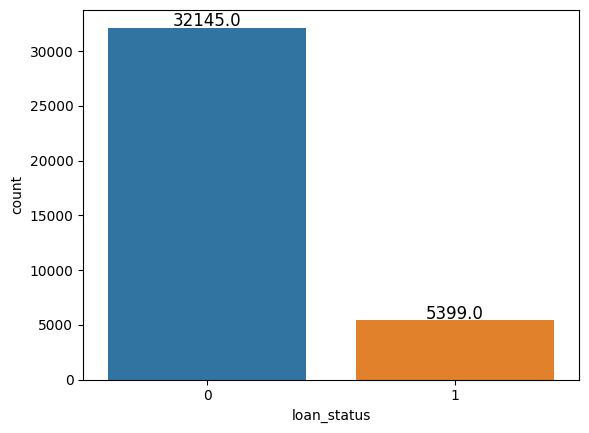

In [378]:
ax = sns.countplot(x = 'loan_status',data = df2_loan)
loan_stat_cnts = df2_loan.loan_status.value_counts()

# Display values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

In [379]:
df2_loan.grade.value_counts()

grade
B    11359
A     9660
C     7669
D     4979
E     2620
F      959
G      298
Name: count, dtype: int64

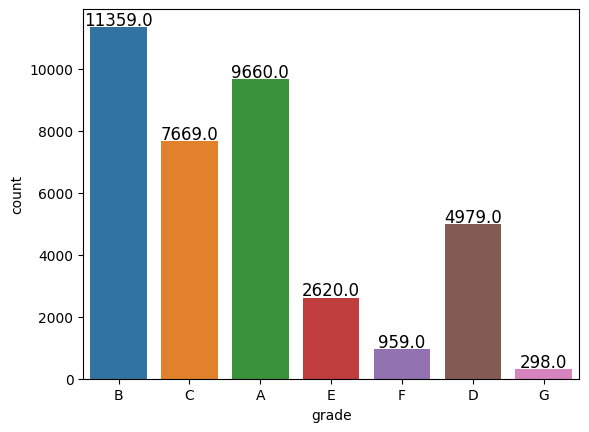

In [380]:
ax = sns.countplot(x='grade' ,data = df2_loan)

# Display values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

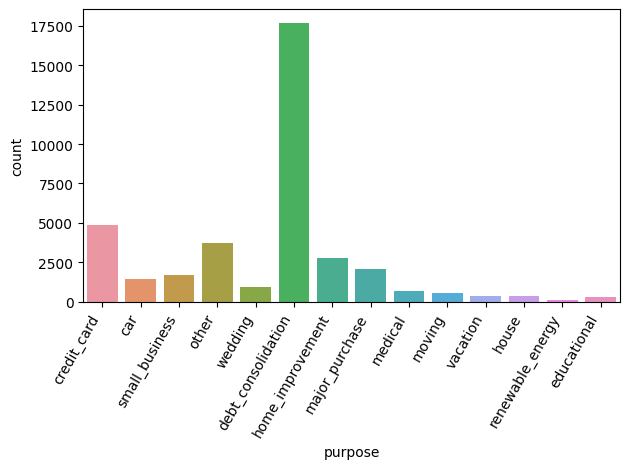

In [381]:
ax = sns.countplot(x='purpose' ,data = df2_loan)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
plt.show()

#From the below graph its evident that debt_consolidation is major reason for taking loans and for credit card 

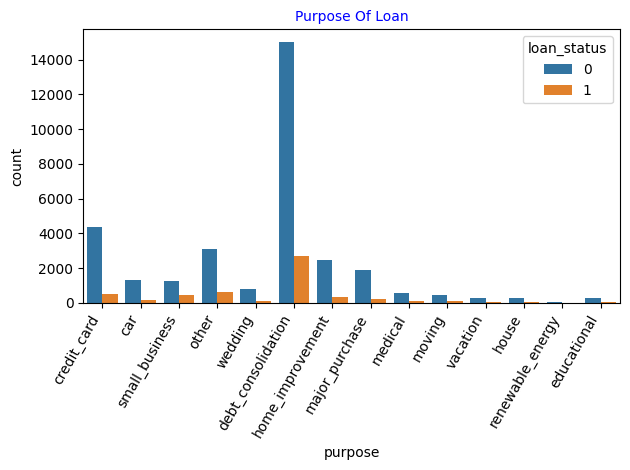

In [382]:
ax = sns.countplot(x='purpose',hue="loan_status" ,data = df2_loan)
ax.set_title('Purpose Of Loan',fontsize=10,color='b')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
plt.show()
#From the below graph its evident that major reason for taking loans is debt_consolidation,
#for paying credit card bills,other,home improvements,major_purchase
#Also Charged off loans are also high in these cases

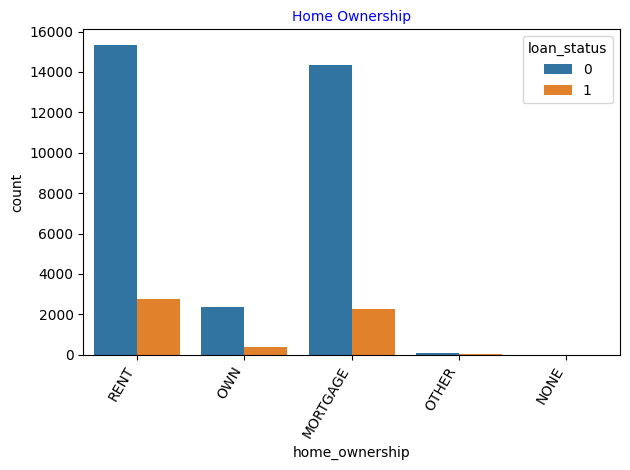

In [383]:
ax = sns.countplot(x="home_ownership",hue="loan_status" ,data = df2_loan)
ax.set_title('Home Ownership',fontsize=10,color='b')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
plt.show()

#Below graph shows that people in Rent and Mortage have more loans
#Also charged off loans are also high in these cases since the applicants are high

In [384]:
# let's also observe the distribution of loans across years
# first lets convert the year column into datetime and then extract year and month from it
df2_loan['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [385]:
from datetime import datetime
df2_loan['issue_d'] = df2_loan['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
df2_loan['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [386]:
# extracting month and year from issue_date
df2_loan['month'] = df2_loan['issue_d'].apply(lambda x: x.month)
df2_loan['year'] = df2_loan['issue_d'].apply(lambda x: x.year)

In [387]:
# let's first observe the number of loans granted across years
df2_loan.groupby('year').year.count()

#Notice that the loans are steadily increasing yearly

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

In [388]:
# number of loans across months
df2_loan.groupby('month').month.count()

#Looks like loans are generally approved in second half of the year and mostly in December

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

In [389]:
# lets define a function to plot loan_status across categorical variables
def plot_cat(cat_var,rotate = 0):
    ax = sns.barplot(x=cat_var, y='loan_status', data=df2_loan)
    # Display values on the bars
    for bar in ax.containers[0]:
        height = bar.get_height()
        ax.annotate(
            f'{height :.3f}',
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 15),
            textcoords="offset points",
            ha='center',
            va='bottom'
        )
            
    plt.xticks(rotation=rotate)
    plt.show()
   

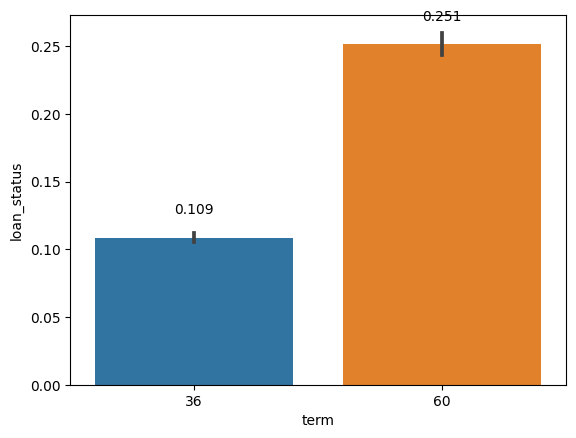

In [390]:
plot_cat('term')
#60 months loans are more default than loans with 36month term

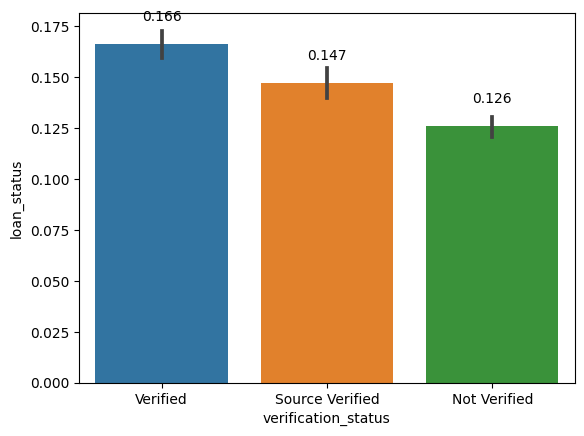

In [391]:
# verification_status: surprisingly, verified loans default more than not verifiedb
plot_cat('verification_status')

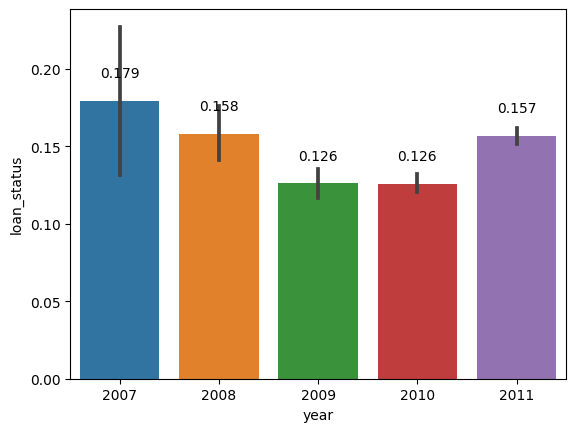

In [392]:
# lets compare the default rates across years
plot_cat('year')
#the default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010

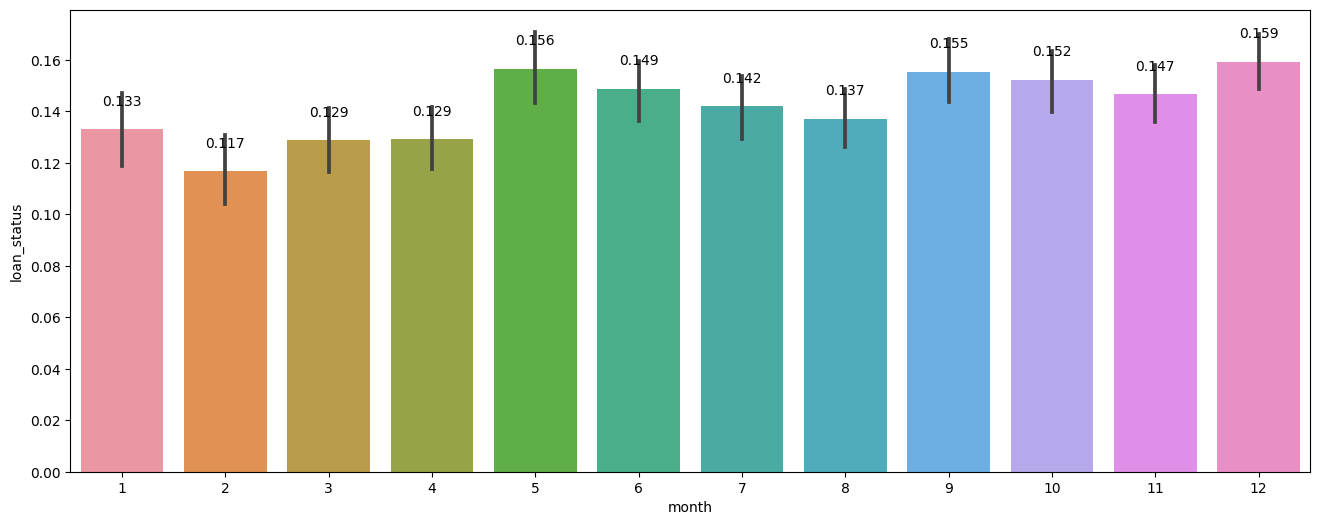

In [393]:
# comparing default rates across months: not much variation across months
plt.figure(figsize=(16, 6))
plot_cat('month')

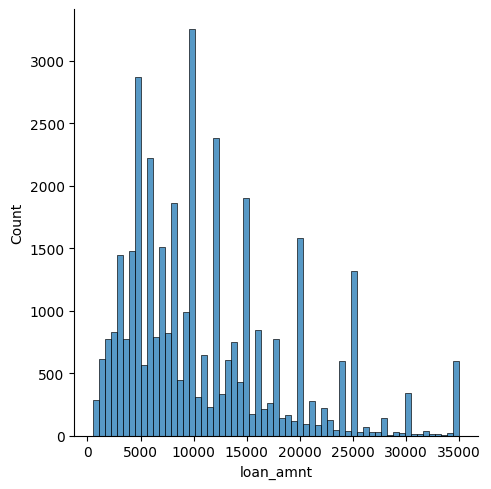

In [394]:
# loan amount: the median loan amount is around 10,000
sns.displot(df2_loan['loan_amnt'])
plt.show()

The easiest way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.

Let's bin the loan amount variable into small, medium, high, very high.

In [395]:
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df2_loan['loan_amnt'] = df2_loan['loan_amnt'].apply(lambda x: loan_amount(x))

In [396]:
df2_loan['loan_amnt'].value_counts()

loan_amnt
medium       20157
high          7572
low           7095
very high     2720
Name: count, dtype: int64

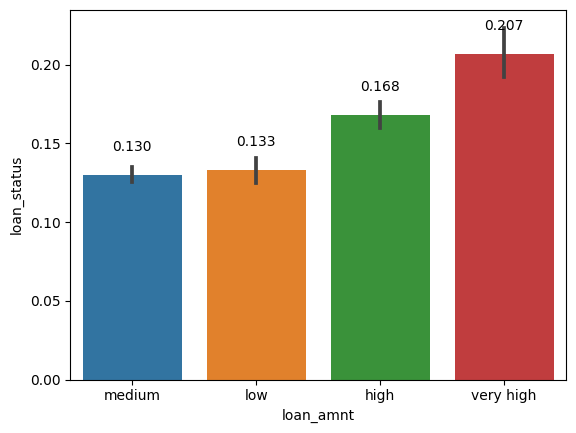

In [397]:
plot_cat('loan_amnt')
#higher the loan amount the default rate is increasing

In [398]:
# let's also convert funded amount invested to bins
df2_loan['funded_amnt_inv'] = df2_loan['funded_amnt_inv'].apply(lambda x: loan_amount(x))

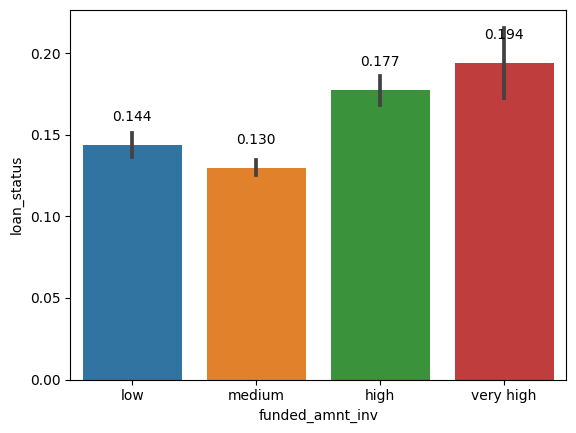

In [399]:
# funded amount invested
plot_cat('funded_amnt_inv')

#higher the funded_amnt_inv the default rate is increasing

In [400]:
df2_loan['int_rate_1'] = df2_loan['int_rate']

In [401]:
# lets also convert interest rate to low, medium, high
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df2_loan['int_rate'] = df2_loan['int_rate'].apply(lambda x: int_rate(x))

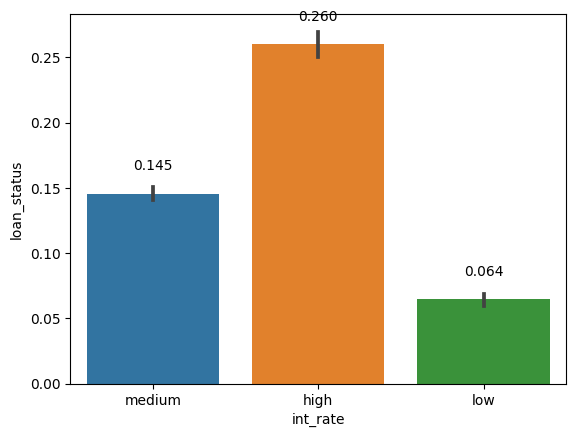

In [402]:
plot_cat('int_rate')

# high interest rates default more

In [403]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df2_loan['dti'] = df2_loan['dti'].apply(lambda x: dti(x))

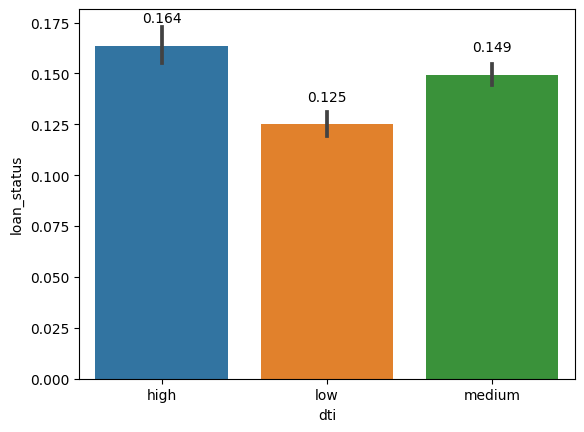

In [404]:
plot_cat('dti')

#high dti translates into higher default rates

In [405]:
# funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
df2_loan['funded_amnt'] = df2_loan['funded_amnt'].apply(lambda x: funded_amount(x))

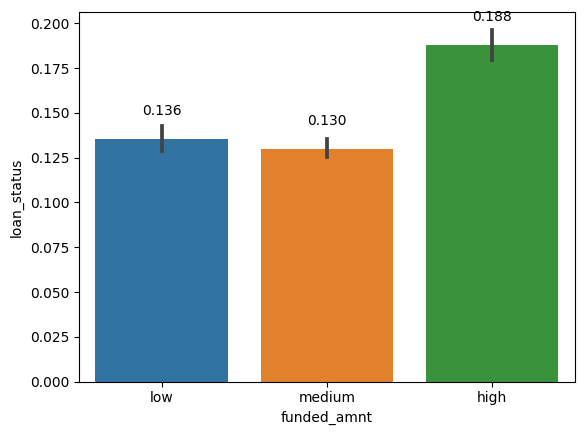

In [406]:
plot_cat('funded_amnt')

#More the funded amount, more the default rate

In [407]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df2_loan['installment'] = df2_loan['installment'].apply(lambda x: installment(x))

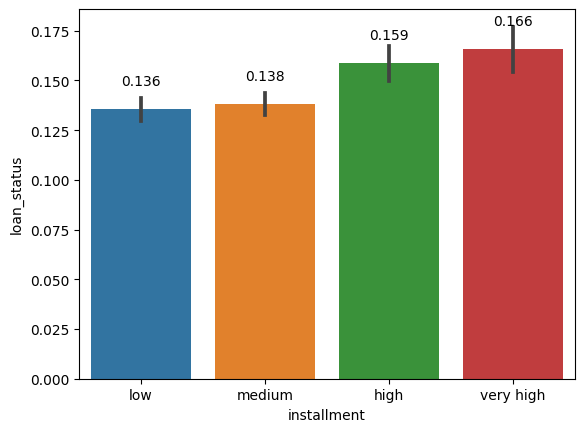

In [408]:
plot_cat('installment')

#More the installment,higher the default rate

In [409]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df2_loan['annual_inc'] = df2_loan['annual_inc'].apply(lambda x: annual_income(x))

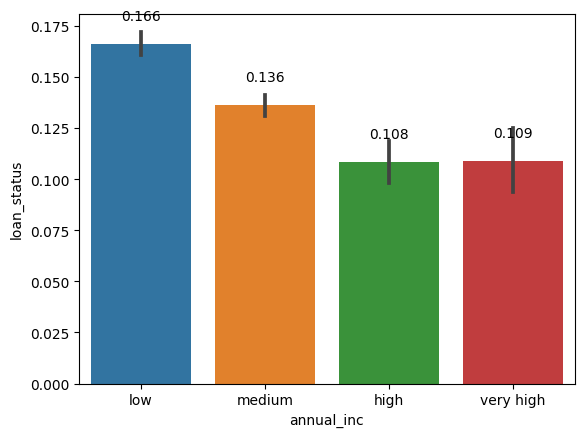

In [410]:
plot_cat('annual_inc')

#Lower the income, higher the default rate

In [411]:
# binning the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

df2_loan['emp_length'] = df2_loan['emp_length'].apply(lambda x: emp_length(x))



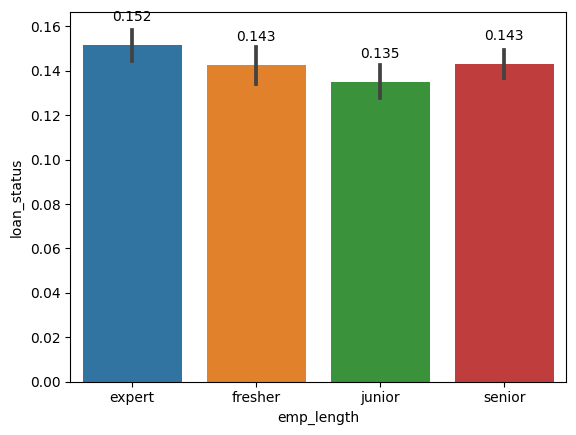

In [412]:
plot_cat('emp_length')

#Almost all the experience levels look closer so not much useful for prediction

***Segmented Univariate Analysis***

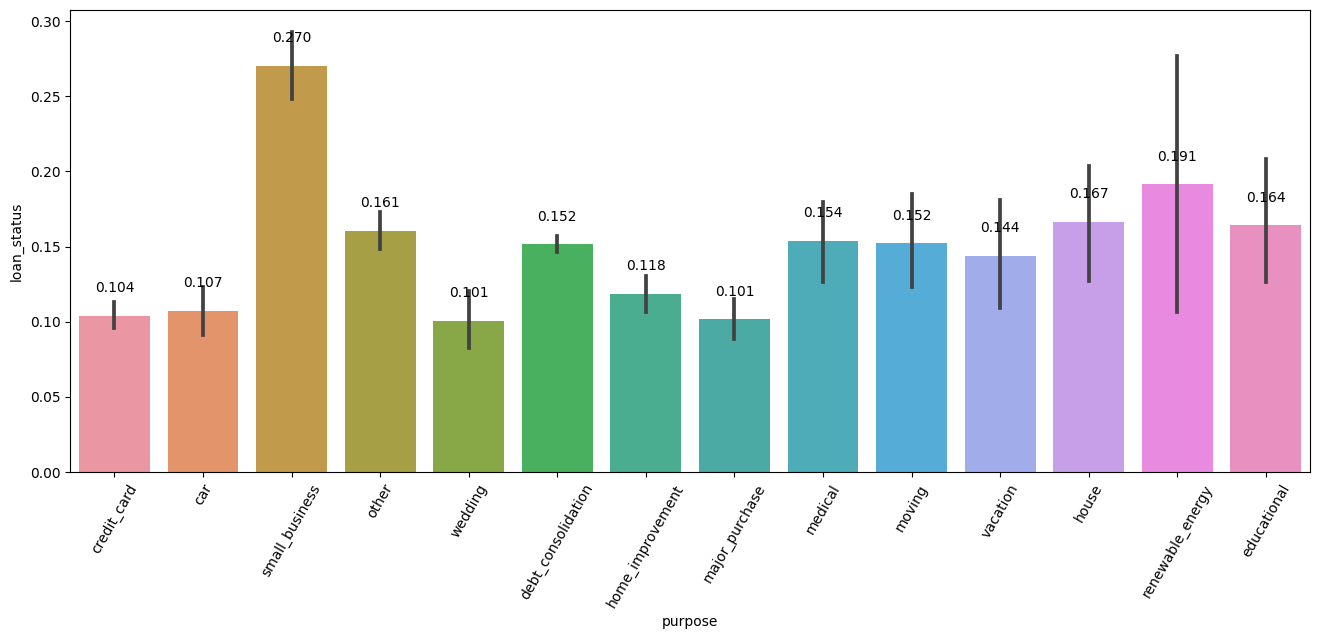

In [413]:
plt.figure(figsize=(16, 6))
plot_cat('purpose',60)

#purpose: small business loans defualt the most, then renewable energy and education

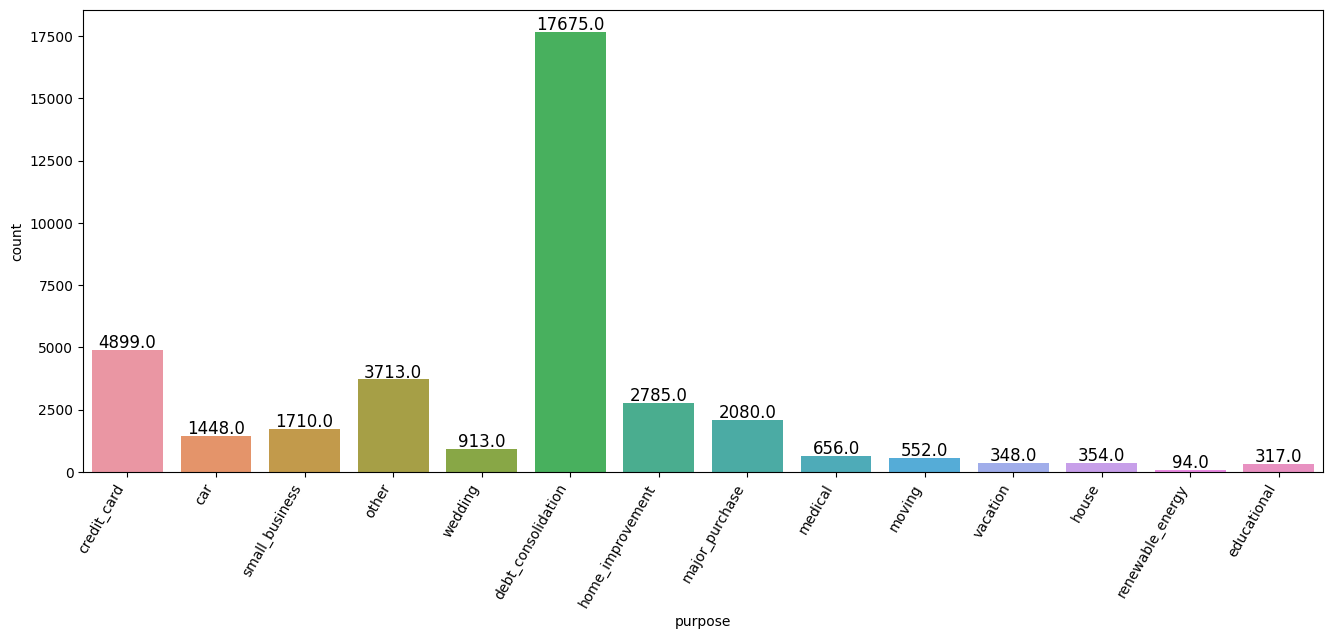

In [414]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plt.figure(figsize=(16, 6))
ax=sns.countplot(x='purpose', data=df2_loan)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

Let's analyse the top 4 types of loans based on purpose: consolidation, credit card, other, home improvement and major purchase.

In [415]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df2_loan = df2_loan[df2_loan['purpose'].isin(main_purposes)]
df2_loan['purpose'].value_counts()

purpose
debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: count, dtype: int64

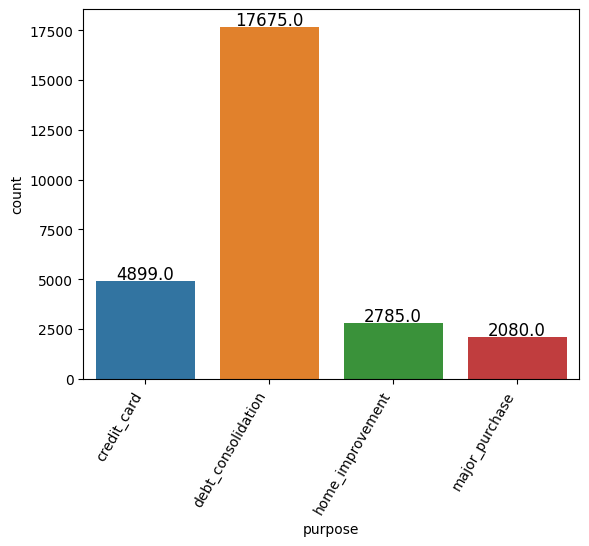

In [416]:
# plotting number of loans by purpose 
ax=sns.countplot(x=df2_loan['purpose'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

let's now compare the default rates across two types of categorical variables

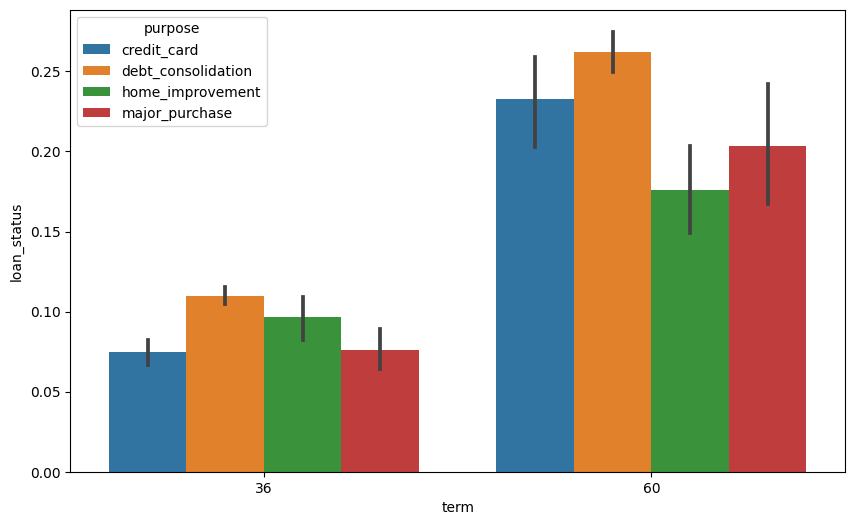

In [417]:
# lets write a function which takes a categorical variable and plots the default rate
# segmented by purpose 

def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df2_loan)
    plt.show()

    
plot_segmented('term')

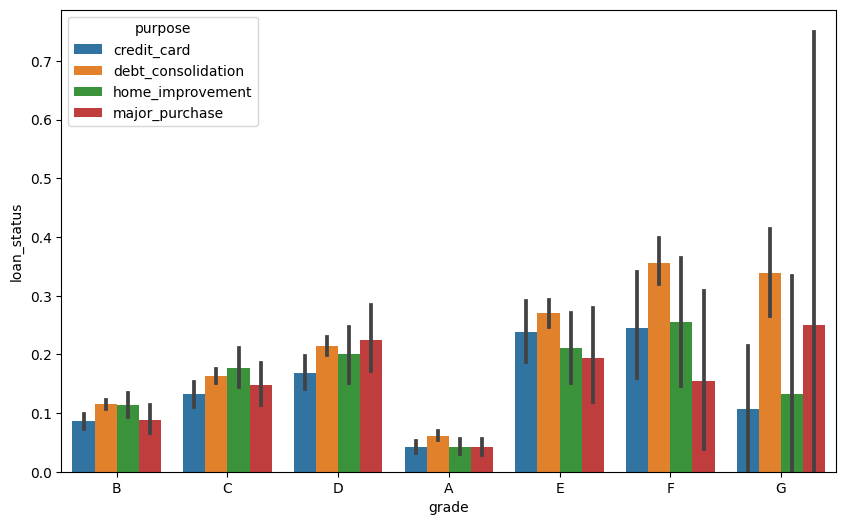

In [418]:
# grade of loan
plot_segmented('grade')

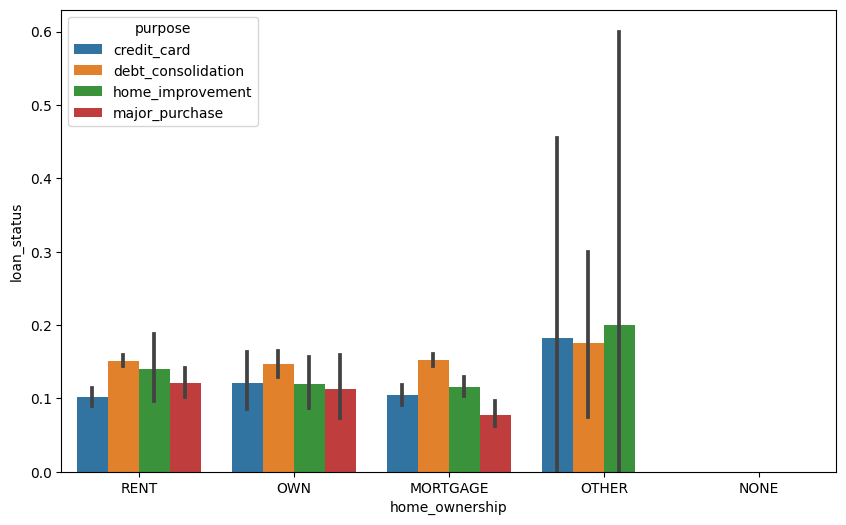

In [419]:
# home ownership
plot_segmented('home_ownership')

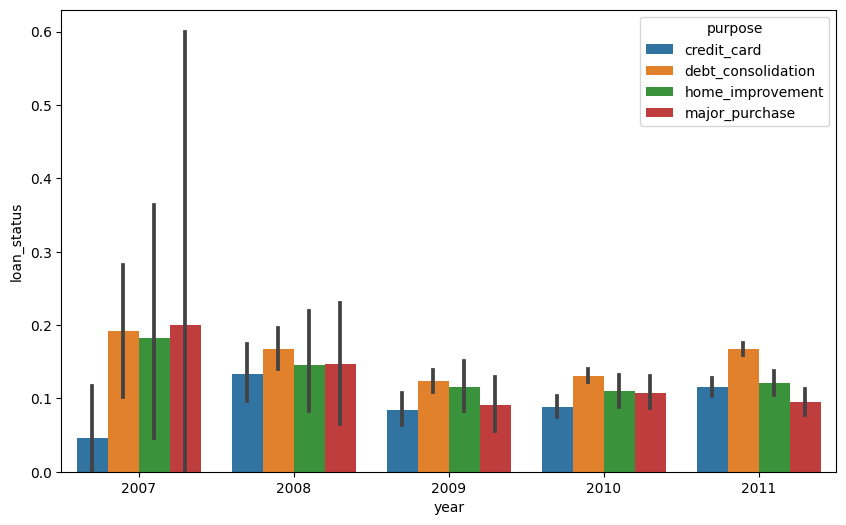

In [420]:
# year
plot_segmented('year')

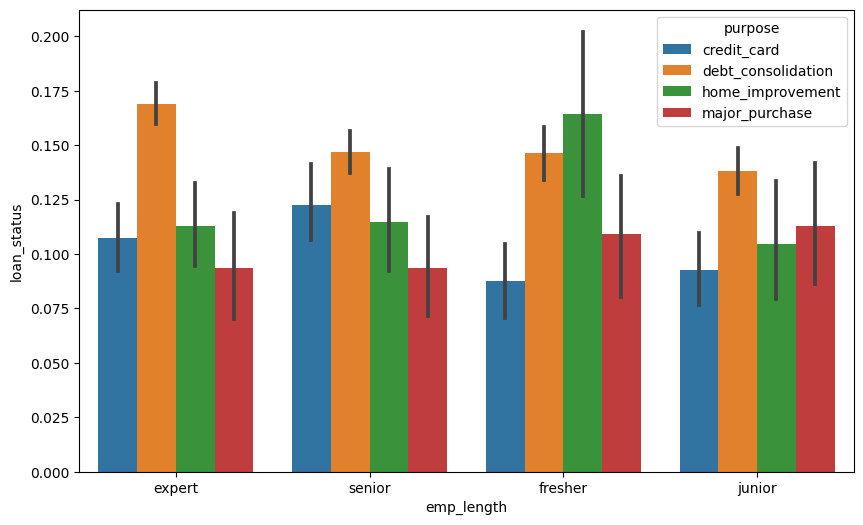

In [421]:
# emp_length
plot_segmented('emp_length')

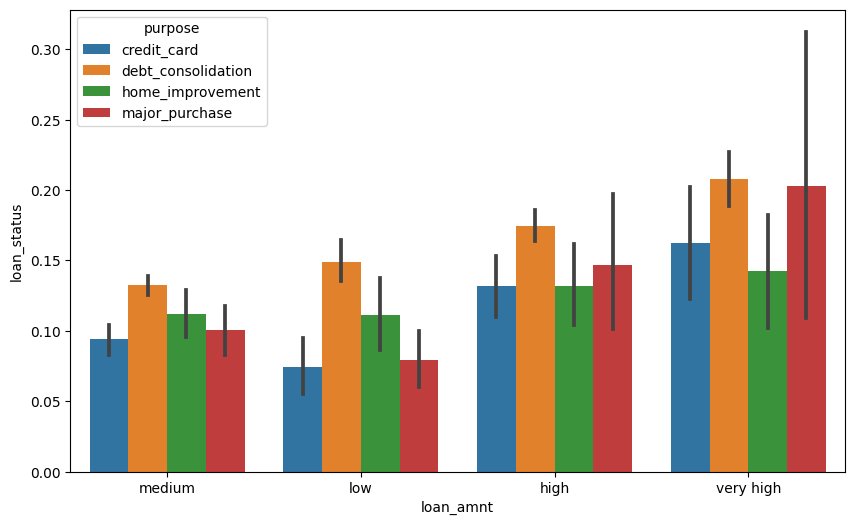

In [422]:
# loan_amnt: same trend across loan purposes
plot_segmented('loan_amnt')

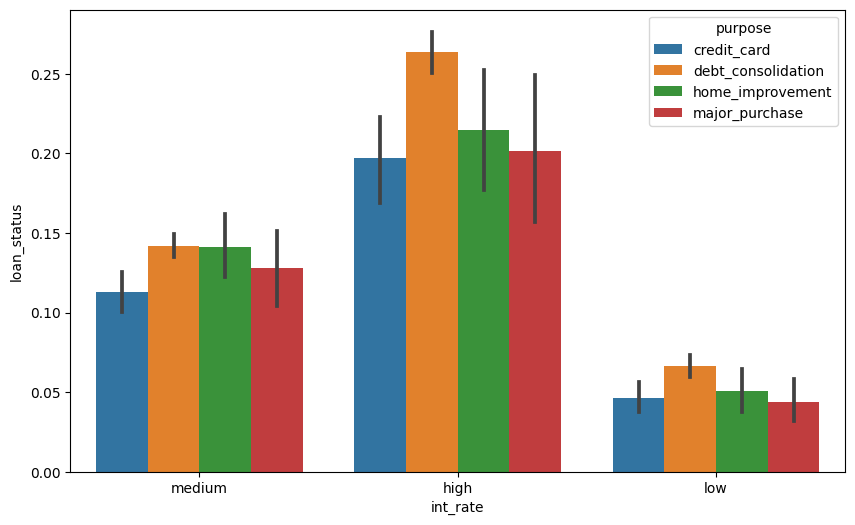

In [423]:
# interest rate
plot_segmented('int_rate')

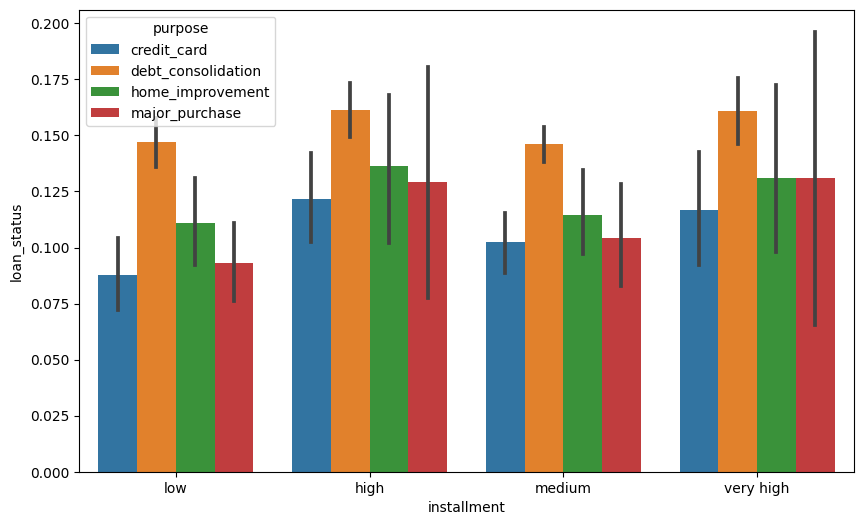

In [424]:
# installment
plot_segmented('installment')

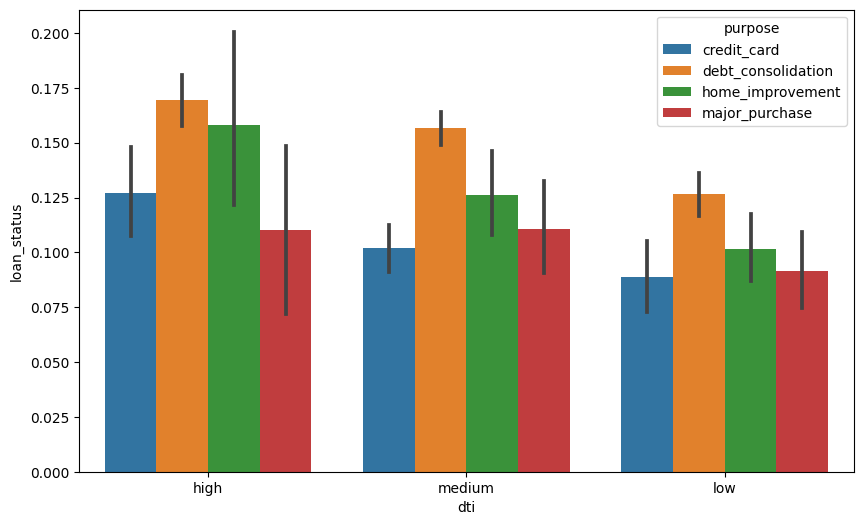

In [425]:
# debt to income ratio
plot_segmented('dti')

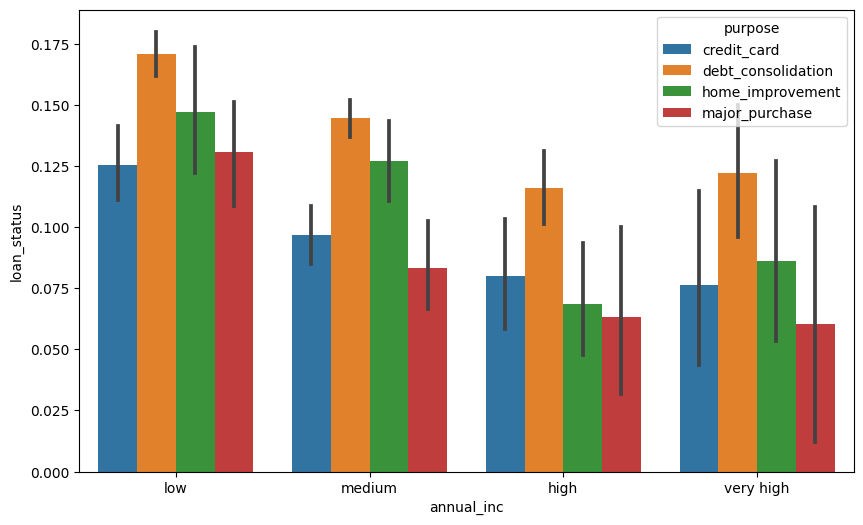

In [426]:
# annual income
plot_segmented('annual_inc')

A good way to quantify th effect of a categorical variable on default rate is to see 'how much does the default rate vary across the categories'.

Let's see an example using annual_inc as the categorical variable.

In [427]:
# Lets write a function which takes in a categorical variable and computed the average 
# default rate across the categories
# It can also compute the 'difference between the highest and the lowest default rate' across the 
# categories, which is a decent metric indicating the effect of the varaible on default rate

def diff_rate(cat_var):
    default_rates = df2_loan.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

default_rates, diff = diff_rate('annual_inc')
print(default_rates) 
print(diff)


annual_inc
low          0.16
medium       0.13
very high    0.10
high         0.10
Name: loan_status, dtype: float64
0.06


Thus, there is a 6% increase in default rate as you go from high to low annual income. We can compute this difference for all the variables and roughly identify the ones that affect default rate the most.

In [428]:
# filtering all the object type variables
df_categorical = df2_loan.loc[:, df2_loan.dtypes == object]
df_categorical['loan_status'] = df2_loan['loan_status']

# Now, for each variable, we can compute the incremental diff in default rates
print([i for i in df2_loan.columns])

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti', 'pub_rec_bankruptcies', 'month', 'year', 'int_rate_1']


In [429]:
# storing the diff of default rates for each column in a dict
d = {key: diff_rate(key)[1]*100 for key in df_categorical.columns if key != 'loan_status'}
print(d)

{'loan_amnt': 7.000000000000001, 'funded_amnt': 5.0, 'funded_amnt_inv': 6.0, 'int_rate': 19.0, 'installment': 3.0, 'grade': 27.0, 'sub_grade': 46.0, 'emp_title': 100.0, 'emp_length': 2.0, 'home_ownership': 16.0, 'annual_inc': 6.0, 'verification_status': 4.0, 'purpose': 5.0, 'dti': 5.0}


In [430]:
home_imp = df2_loan.groupby(by = 'purpose')['year'].value_counts()

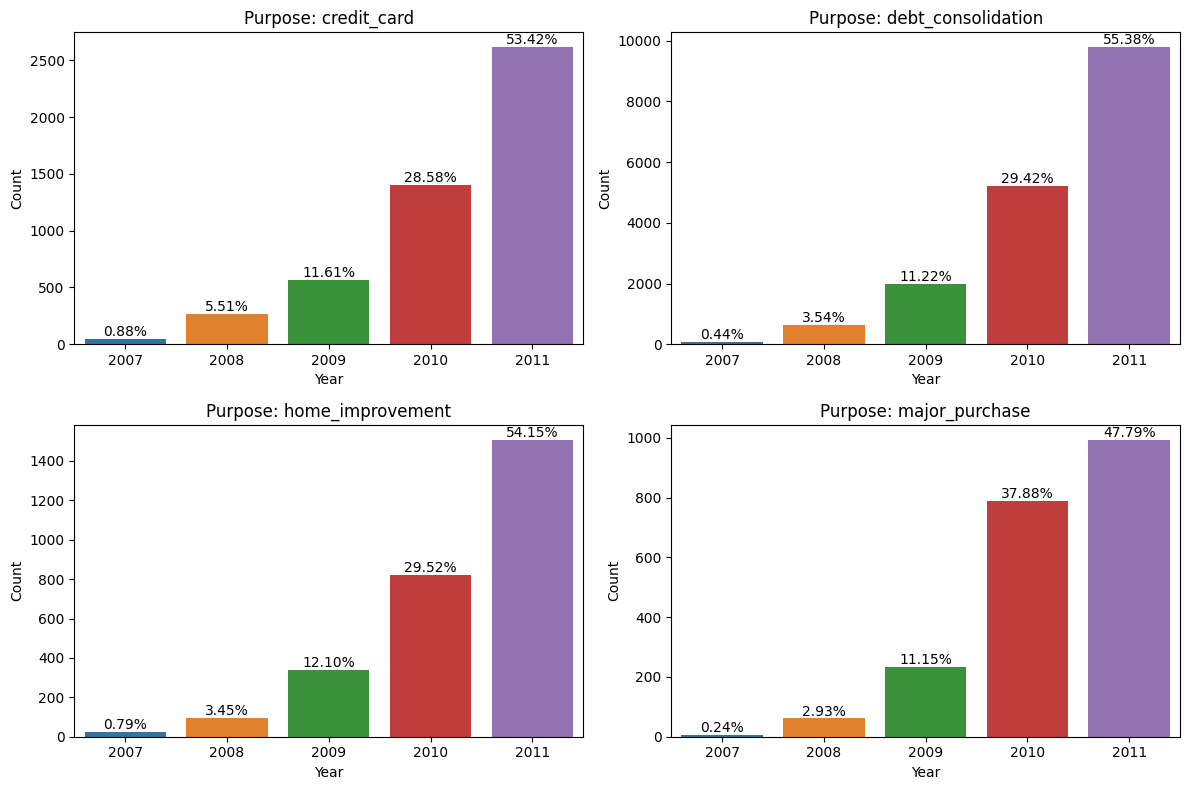

In [431]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for i, purpose in enumerate(main_purposes):
    ax = axes[i]
    purpose_data = home_imp[purpose]
    total_count = purpose_data.sum()

    sns.barplot(x=purpose_data.index, y=purpose_data.values, ax=ax)

    # Adding percentage values as bar labels
    for p in ax.patches:
        percentage = p.get_height() / total_count * 100
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    ax.set_title(f'Purpose: {purpose}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

In [432]:
term_imp = df2_loan.groupby(by = 'purpose')['term'].value_counts()

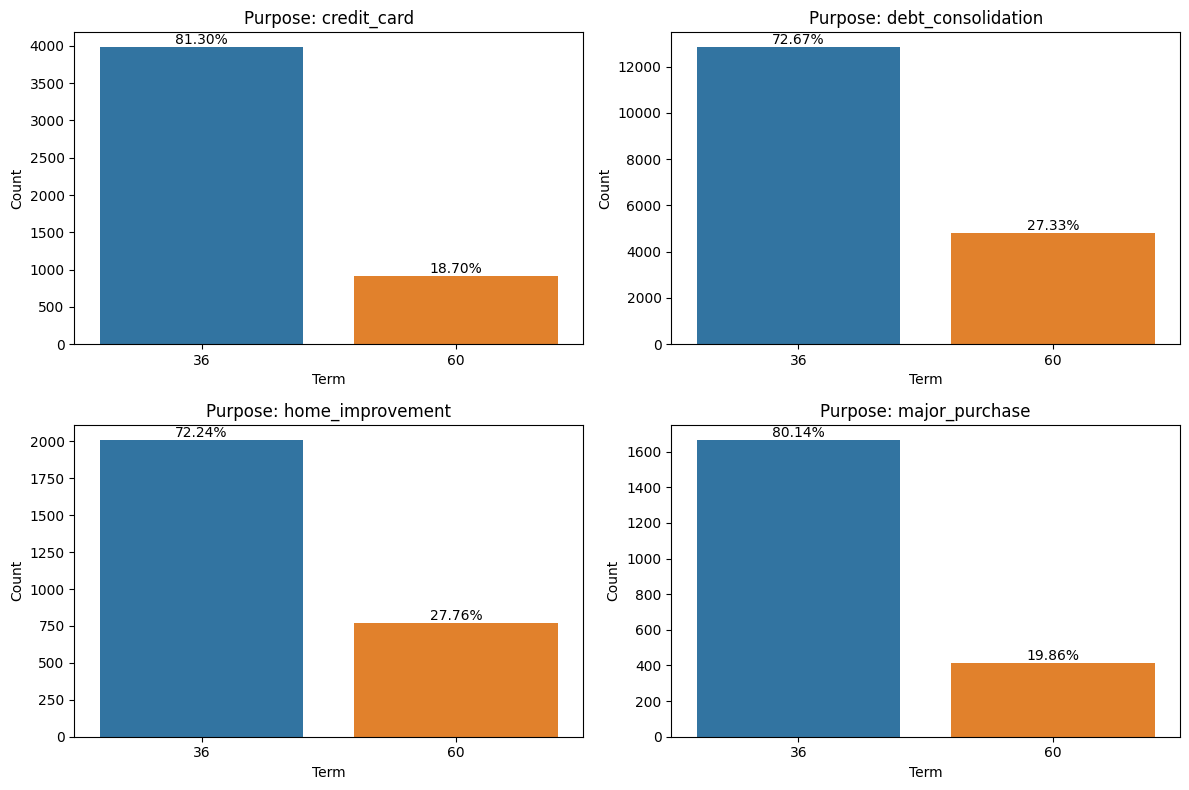

In [433]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for i, purpose in enumerate(main_purposes):
    ax = axes[i]
    purpose_data = term_imp[purpose]
    total_count = purpose_data.sum()

    sns.barplot(x=purpose_data.index, y=purpose_data.values, ax=ax)

    # Adding percentage values as bar labels
    for p in ax.patches:
        percentage = p.get_height() / total_count * 100
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    ax.set_title(f'Purpose: {purpose}')
    ax.set_xlabel('Term')
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

In [434]:
grade_imp = df2_loan.groupby(by = 'purpose')['grade'].value_counts()

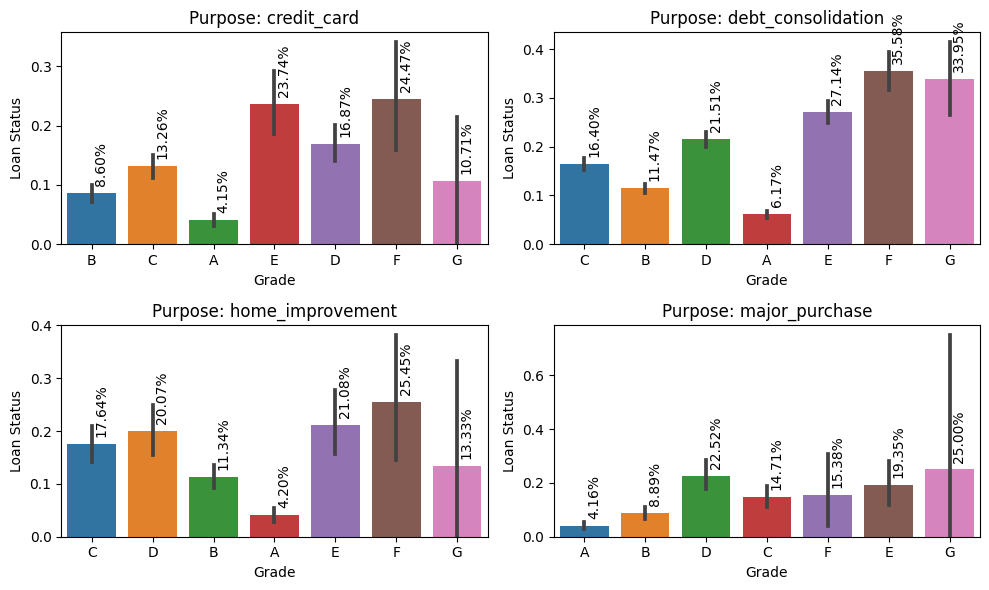

In [435]:
plt.figure(figsize=[10, 6])

unique_purposes = ['credit_card', 'debt_consolidation', 'home_improvement','major_purchase']
num_rows = 2
num_cols =2
for i, purpose in enumerate(unique_purposes):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    purpose_data = df2_loan[df2_loan['purpose'] == purpose]
    c = sns.barplot(
        x='grade',
        y='loan_status',
        data=purpose_data
    )

    for container in c.containers:
        for bar in container:
            height = bar.get_height()
            c.annotate(
                f'{height * 100:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(7, 5),
                rotation=90,
                textcoords="offset points",
                ha='center',
                va='bottom'
            )

    plt.title(f'Purpose: {purpose}')
    plt.xlabel('Grade')
    plt.ylabel('Loan Status')

plt.tight_layout()
plt.show()

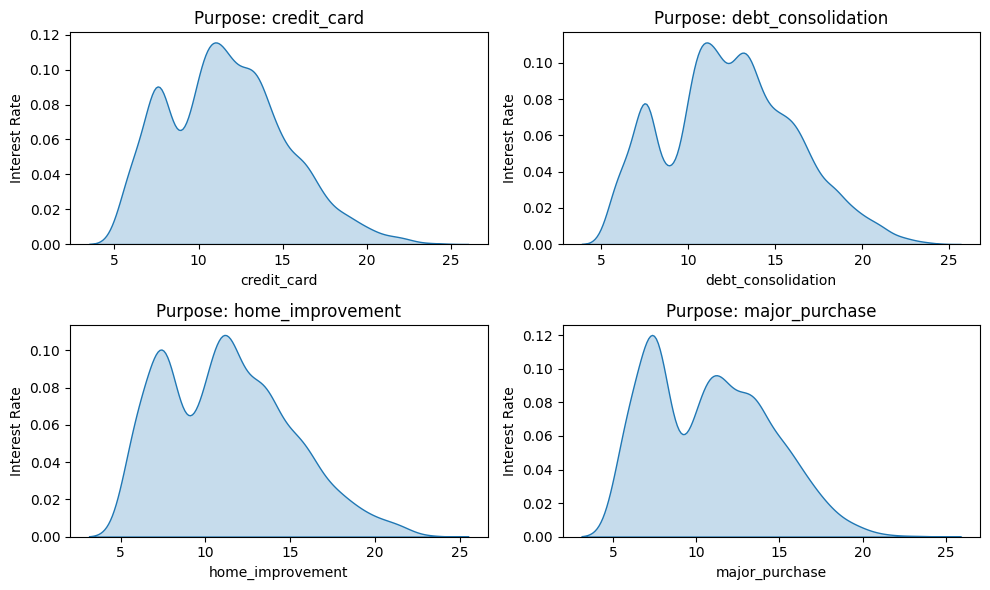

In [436]:
plt.figure(figsize=[10, 6])

unique_purposes = ['credit_card', 'debt_consolidation', 'home_improvement','major_purchase']
num_rows = 2
num_cols =2
for i, purpose in enumerate(unique_purposes):
    ax = plt.subplot(num_rows, num_cols, i + 1)

    purpose_data = df2_loan[df2_loan['purpose'] == purpose]

    sns.distplot(
        purpose_data['int_rate_1'],
        hist=False,
        kde_kws={'shade': True}

    )
    plt.title(f'Purpose: {purpose}')
    plt.ylabel('Interest Rate')
    plt.xlabel(purpose)

plt.tight_layout()
plt.show()

In [440]:
pip show matplotlib Name:

Name: matplotlib
Version: 3.7.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: C:\Users\Anu\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: seaborn
Note: you may need to restart the kernel to use updated packages.


In [441]:
pip show seaborn

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: C:\Users\Anu\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.
